In [18]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

%matplotlib inline

In [19]:
data = pd.read_csv(r'C:\Users\ASUS\Desktop\Research Internship\Fraud Detection\FL1\data\creditcard_train.csv')
data.head()

,Unnamed: 0,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,83548,-0.244673,-0.291134,-5.815400,-2.542417,-0.644472,0.625949,2.238756,-1.270332,-0.016385,...,-3.024207,-1.816265,-0.318061,2.940325,-0.993230,1.210458,0.426390,2.208567,-0.956596,0.0
1,232924,-0.279746,0.736369,2.085292,0.122583,-1.777613,0.385266,0.453063,-0.801902,0.153460,...,-0.177902,-0.379694,-1.008647,0.325436,0.367197,-0.251827,0.182760,-0.065744,-0.032919,0.0
2,254627,-0.028645,0.847461,2.122316,-0.962503,-2.525940,-1.676110,1.626630,3.408812,-1.529461,...,0.112909,0.238221,0.661569,0.142103,0.604128,-0.112563,-0.067314,0.048173,-0.017584,0.0
3,49484,3.684762,-0.477073,-0.547367,-1.240848,0.039306,-2.613958,0.476080,4.030809,-0.098471,...,0.576737,-0.172700,-0.795684,0.615092,0.918412,-0.061868,-0.324071,0.046531,0.131785,0.0
4,43982,-0.097813,-0.504752,-0.171879,-0.229433,0.877708,-2.033562,-0.370525,0.662273,-0.512095,...,-0.244155,-0.060867,0.181646,-0.128371,-1.153934,-0.519082,-0.152173,-0.056434,0.131185,0.0


0.0    255888
1.0       438
Name: Class, dtype: int64

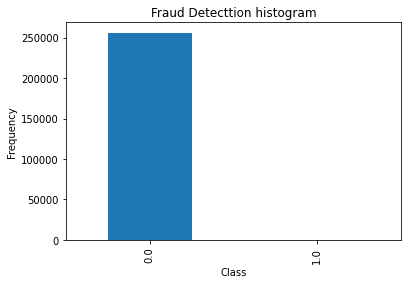

In [20]:
pd.value_counts(data['Class']).plot.bar()
plt.title('Fraud Detecttion histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
data['Class'].value_counts()

In [21]:
X = np.array(data.loc[:, data.columns != 'Class'])
y = np.array(data.loc[:, data.columns == 'Class'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (256326, 31)
Shape of y: (256326, 1)


In [29]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (192244, 31)
Number transactions y_train dataset:  (192244, 1)
Number transactions X_test dataset:  (64082, 31)
Number transactions y_test dataset:  (64082, 1)


In [30]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [340]
Before OverSampling, counts of label '0': [191904] 

After OverSampling, the shape of train_X: (383808, 31)
After OverSampling, the shape of train_y: (383808,) 

After OverSampling, counts of label '1': 191904
After OverSampling, counts of label '0': 191904


In [16]:
import numpy as np
import pandas as pd

y_train_res = y_train_res.reshape(-1, 1) # reshaping y_train to (398038,1)
data_res = np.concatenate((X_train_res, y_train_res), axis = 1)
np.savetxt('creditcard_train_SMOTE_1.csv', data_res, delimiter=",")